In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [4]:
#Billboard Top #1 By Week from 1958 to 2021
bb1 = bb100[bb100['Week Position']==1].copy()
bb1.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
944,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
22342,http://www.billboard.com/charts/hot-100/1958-08-09,1958-08-09,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,1.0,1,2
232960,https://www.billboard.com/charts/hot-100/2021-05-22,2021-05-22,1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door OpenSilk Sonic (Bruno Mars & Anderson .Paak),1,2.0,1,10
3522,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,1,Good 4 U,Olivia Rodrigo,Good 4 UOlivia Rodrigo,1,NaN,1,1


In [5]:
#Precise Song Names
bb1['Song'].replace({'Candle In The Wind 1997/Something About The Way You Look Tonight':'Candle In The Wind'}, inplace=True)
bb1['Song'].replace({'Macarena (Bayside Boys Mix)':'Macarena'}, inplace=True)
bb1['Song'].replace({'End Of The Road (From "Boomerang")':'End Of The Road'}, inplace=True)

In [6]:
#Extract Year Of Release as String and concatenate with Song Name:
bb1['Year'] = bb1['WeekID'].dt.year.astype(str)
keep = ['WeekID', 'Song', 'Year']
bb1 = bb1[keep]
bb1['Song + Year'] = bb1['Song'] + ' (' + bb1['Year'] + ')'

In [7]:
#Concatenate Songs which overlap calendar year in their streak:
bb1['Song + Year'].replace({'One Sweet Day (1996)':'One Sweet Day (1995)'}, inplace=True)
bb1['Song + Year'].replace({'I Will Always Love You (1993)':'I Will Always Love You (1992)'}, inplace=True)
bb1['Song + Year'].replace({'Candle In The Wind (1998)':'Candle In The Wind (1997)'}, inplace=True)

In [8]:
#Check:
bb1.head(10)

,WeekID,Song,Year,Song + Year
654,1977-04-23,Don't Leave Me This Way,1977,Don't Leave Me This Way (1977)
944,1958-08-02,Poor Little Fool,1958,Poor Little Fool (1958)
945,1995-12-02,One Sweet Day,1995,One Sweet Day (1995)
946,1997-10-11,Candle In The Wind,1997,Candle In The Wind (1997)
947,2006-07-01,Do I Make You Proud,2006,Do I Make You Proud (2006)
948,2009-10-24,3,2009,3 (2009)
949,2010-05-22,Not Afraid,2010,Not Afraid (2010)
950,2011-02-26,Born This Way,2011,Born This Way (2011)
951,2012-03-03,Part Of Me,2012,Part Of Me (2012)
952,2014-09-06,Shake It Off,2014,Shake It Off (2014)


In [9]:
#Sort bb1 by Year
bb1.sort_values(by=['Year'], inplace=True, ascending=False)
bb1.head(10)

,WeekID,Song,Year,Song + Year
315934,2021-01-16,Mood,2021,Mood (2021)
3520,2021-01-23,Drivers License,2021,Drivers License (2021)
141569,2021-02-13,Drivers License,2021,Drivers License (2021)
218610,2021-03-06,Drivers License,2021,Drivers License (2021)
104737,2021-01-30,Drivers License,2021,Drivers License (2021)
144751,2021-03-27,Up,2021,Up (2021)
166933,2021-02-06,Drivers License,2021,Drivers License (2021)
286292,2021-05-08,Save Your Tears,2021,Save Your Tears (2021)
304061,2021-01-02,All I Want For Christmas Is You,2021,All I Want For Christmas Is You (2021)
147215,2021-03-20,What's Next,2021,What's Next (2021)


In [10]:
#Series to DF (top 12), Sort by 2 conditions, frequency count and Year of Release.
rankdf = pd.value_counts(bb1['Song + Year']).to_frame().reset_index().iloc[:12]
rankdf['Year'] = [2019, 2017, 1995, 1996, 2015, 1994, 1997, 1992, 2009, 2005, 1992, 1998]
rankdf.sort_values(['Song + Year', 'Year'], ascending=[False, False], inplace=True)

In [11]:
#Check:
rankdf

,index,Song + Year,Year
0,Old Town Road (2019),19,2019
1,Despacito (2017),16,2017
2,One Sweet Day (1995),16,1995
4,Uptown Funk! (2015),14,2015
8,I Gotta Feeling (2009),14,2009
9,We Belong Together (2005),14,2005
6,Candle In The Wind (1997),14,1997
3,Macarena (1996),14,1996
5,I'll Make Love To You (1994),14,1994
7,I Will Always Love You (1992),14,1992


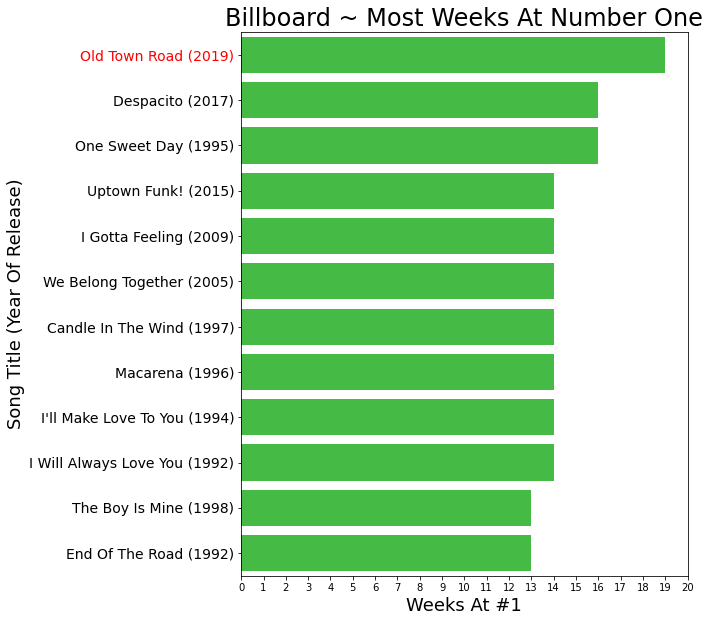

In [12]:
#Plot Organized Barplot:
plt.figure(figsize=(8,10))
plt.title('Billboard ~ Most Weeks At Number One', fontsize=24)
sns.barplot(x='Song + Year', y='index', data=rankdf, color='limegreen')
plt.xlabel('Weeks At #1', fontsize=18)
plt.ylabel('Song Title (Year Of Release)', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,21,1))
plt.gca().get_yticklabels()[0].set_color("red")
plt.savefig('Top1sYr.png', bbox_inches='tight', pad_inches=2);

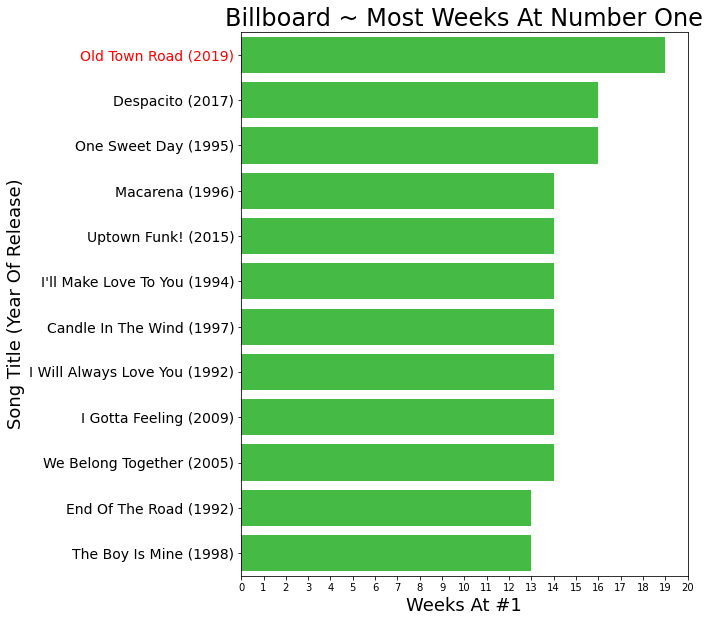

In [13]:
#Unordered by Year of Release as second condition
plt.figure(figsize=(8,10))
plt.title('Billboard ~ Most Weeks At Number One', fontsize=24)
sns.countplot(y='Song + Year', data=bb1, order=pd.value_counts(bb1['Song + Year']).iloc[:12].index, color='limegreen')
plt.xlabel('Weeks At #1', fontsize=18)
plt.ylabel('Song Title (Year Of Release)', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,21,1))
plt.gca().get_yticklabels()[0].set_color("red")
#plt.savefig('Top1sYr.png', bbox_inches='tight', pad_inches=2);‹